In [1]:
import torch 

In [6]:
import helper

In [28]:
from torch import nn

In [2]:
from torchvision import transforms,datasets

In [26]:
from torch import optim

In [23]:
from matplotlib import pyplot as plt

In [12]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

In [13]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [15]:
images, labels = next(iter(trainloader))
print(images.shape)
print(type(images))
print(labels.shape)
print(type(labels))

torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([64])
<class 'torch.Tensor'>


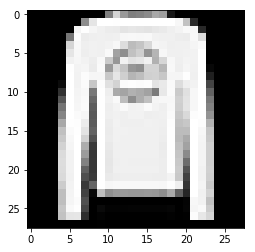

In [25]:
plt.imshow(images[0].numpy().squeeze(),cmap = 'Greys_r')

In [55]:
model = nn.Sequential(nn.Linear(784,128),
                       nn.ReLU(),
                      nn.Linear(128,64),
                       nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
optimizer = optim.Adam(model.parameters(),lr = 0.03)
criterion = nn.NLLLoss()
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training_loss:{running_loss/len(trainloader)}")

Training_loss:0.7220383388464893
Training_loss:0.6401662783645617
Training_loss:0.6068999306606585
Training_loss:0.5869464556863313
Training_loss:0.5827416720897404


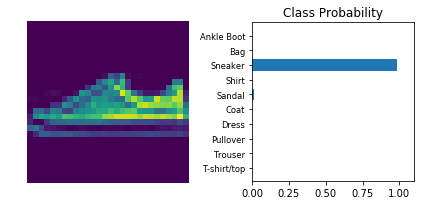

In [65]:
%matplotlib inline
import helper
images, labels = next(iter(trainloader))
img = images[1].view(1,784)
ps = torch.exp(model(img))
helper.view_classify(img,ps,version = 'Fashion')

In [39]:
import torch.nn.functional as F

In [35]:
class Classifier(nn.Module):
    def __init__(self):
        super.__init__
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        return x

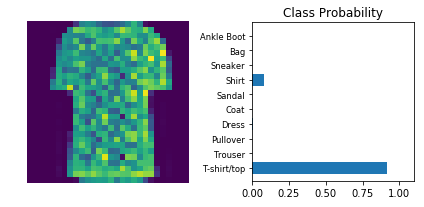

In [73]:
%matplotlib inline
import helper
images, labels = next(iter(testloader))
img = images[1].view(1,784)
ps = torch.exp(model(img))
helper.view_classify(img,ps,version = 'Fashion')